#### December, 2020
## BQOM 2578 Data Mining Final Project :
### Predicting Subscribers and Trialists with MUBI Data
_____________________________________
#### Monica Kim
#### MS in Marketing Science and Business Analytics, University of Pittsburgh

This final project was done for Data Mining course(Fall 2020) at the University of Pittsburgh. The data used in the project was retrieved from Kaggle (https://www.kaggle.com/clementmsika/mubi-sqlite-database-for-movie-lovers) <br>
For questions regarding the project and final paper, please send me an email to monicakim@pitt.edu

***
### Data Preprocessing and Exploratory Analysis
***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
pd.set_option("display.max_columns", None)

In [2]:
listdf = pd.read_csv('mubi_lists_data.csv')
moviedf = pd.read_csv('mubi_movie_data.csv')
ratingsdf = pd.read_csv('mubi_ratings_data.csv', error_bad_lines=False)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
listdf.head()

,user_id,list_id,list_title,list_movie_number,list_update_timestamp_utc,list_creation_timestamp_utc,list_followers,list_url,list_comments,list_description,list_cover_image_url,list_first_image_url,list_second_image_url,list_third_image_url
0,85981819,1969,250 Favourite Films,250,2019-11-26 03:20:17,2009-12-18 13:04:48,23,http://mubi.com/lists/250-favourite-films,5,"<p>In a loose order, but an order nonetheless....",https://assets.mubicdn.net/images/film/115/ima...,https://assets.mubicdn.net/images/film/115/ima...,https://assets.mubicdn.net/images/film/3664/im...,https://assets.mubicdn.net/images/film/187/ima...
1,85981819,3946,Films that should be better known,181,2020-05-01 05:54:39,2010-01-30 16:27:27,308,http://mubi.com/lists/films-that-should-be-bet...,11,<p>These are the films that need to be in more...,https://assets.mubicdn.net/images/film/20780/i...,https://assets.mubicdn.net/images/film/20780/i...,https://assets.mubicdn.net/images/film/19167/i...,https://assets.mubicdn.net/images/film/23056/i...
2,85981819,6683,Films by country (completely stolen from Glemaud),179,2020-04-12 08:31:35,2010-03-31 08:55:10,32,http://mubi.com/lists/films-by-country-complet...,5,"<p>Being a compulsive listmaker, cinéphile and...",https://assets.mubicdn.net/images/film/40676/i...,https://assets.mubicdn.net/images/film/40676/i...,https://assets.mubicdn.net/images/film/99891/i...,https://assets.mubicdn.net/images/film/32597/i...
3,85981819,8865,Play it cool.,56,2018-12-14 14:53:41,2010-05-10 08:18:40,10,http://mubi.com/lists/play-it-cool,1,<p>A work in progress…</p>\n<p>This is intende...,https://assets.mubicdn.net/images/film/11573/i...,https://assets.mubicdn.net/images/film/11573/i...,https://assets.mubicdn.net/images/film/25451/i...,https://assets.mubicdn.net/images/film/1418/im...
4,85981819,13796,Cinemalism (work in progress),121,2019-11-26 03:20:23,2010-08-25 14:23:56,43,http://mubi.com/lists/cinemalism-work-in-progress,3,<p>An ongoing list collecting the best in mini...,https://assets.mubicdn.net/images/film/113749/...,https://assets.mubicdn.net/images/film/113749/...,https://assets.mubicdn.net/images/film/160533/...,https://assets.mubicdn.net/images/film/95112/i...


In [4]:
listdf['user_id'].nunique()

23118

In [5]:
listdf['list_id'].nunique()

80311

In [6]:
listdf['list_movie_number'].mean()

37.65771812080537

In [7]:
listdf['list_movie_number'].max()

10915

In [8]:
listdf['list_movie_number'].min()

0

In [9]:
import datetime as dt

listdf['list_creation_timestamp_utc'] = pd.to_datetime(listdf.list_creation_timestamp_utc,format='%Y-%m-%d %H:%M:%S')
listdf['list_update_timestamp_utc'] = pd.to_datetime(listdf.list_update_timestamp_utc,format='%Y-%m-%d %H:%M:%S')

listdf['Creation_to_update_time'] = (listdf['list_update_timestamp_utc'] - listdf['list_creation_timestamp_utc']).dt.days
listdf = listdf.astype({'Creation_to_update_time': object})

In [10]:
listdf1=pd.pivot_table(listdf, index=['user_id'],values=['list_id'],aggfunc=len)
listdf2=pd.pivot_table(listdf, index=['user_id'],values=['list_followers','list_comments','list_movie_number'],aggfunc=np.sum)
listdf3=pd.pivot_table(listdf, index=['user_id'],values=['Creation_to_update_time'],aggfunc=max)
listdf4=pd.concat([listdf1,listdf2,listdf3], axis=1, sort=False).reset_index()

In [11]:
listdf4 = listdf4.rename(columns={'list_id':'list_count','list_comments':'comments_sum','list_followers':'followers_sum'})

In [12]:
listdf4['list_count'].sort_values()

11558       1
13604       1
13608       1
13609       1
13611       1
         ... 
6244      308
14305     330
4226      434
10997    1097
4144     1263
Name: list_count, Length: 23118, dtype: int64

In [13]:
listdf5 = listdf.groupby('user_id')[['list_movie_number','list_followers','list_comments']].sum()
listdf5.sort_values('list_followers', ascending = False)

,list_movie_number,list_followers,list_comments
user_id,,,
61596227,34805,46415,3438
18285316,12252,9537,1441
86799281,17155,6597,476
43266750,4313,6130,334
7614253,3247,5304,62
...,...,...,...
40008160,134,0,0
39987903,12,0,0
39972537,5,0,0


In [14]:
moviedf.head()

,movie_id,movie_title,movie_release_year,movie_url,movie_title_language,movie_popularity,movie_image_url,director_id,director_name,director_url
0,1,La Antena,2007.0,http://mubi.com/films/la-antena,en,105,https://images.mubicdn.net/images/film/1/cache...,131,Esteban Sapir,http://mubi.com/cast/esteban-sapir
1,2,Elementary Particles,2006.0,http://mubi.com/films/elementary-particles,en,23,https://images.mubicdn.net/images/film/2/cache...,73,Oskar Roehler,http://mubi.com/cast/oskar-roehler
2,3,It's Winter,2006.0,http://mubi.com/films/its-winter,en,21,https://images.mubicdn.net/images/film/3/cache...,82,Rafi Pitts,http://mubi.com/cast/rafi-pitts
3,4,Kirikou and the Wild Beasts,2005.0,http://mubi.com/films/kirikou-and-the-wild-beasts,en,46,https://images.mubicdn.net/images/film/4/cache...,"89, 90","Michel Ocelot, Bénédicte Galup","http://mubi.com/cast/michel-ocelot, http://mub..."
4,5,Padre Nuestro,2007.0,http://mubi.com/films/padre-nuestro,en,7,https://images.mubicdn.net/images/film/5/cache...,92,Christopher Zalla,http://mubi.com/cast/christopher-zalla


In [15]:
moviedf['movie_id'].nunique()

226575

In [16]:
moviedf['movie_popularity'].max()

13989

In [17]:
moviedf['director_name'].nunique()

95645

In [18]:
ratingsdf.head()

,movie_id,rating_id,rating_url,rating_score,rating_timestamp_utc,critic,critic_likes,critic_comments,user_id,user_trialist,user_subscriber,user_eligible_for_trial,user_has_payment_method
0,1066,15610495,http://mubi.com/films/pavee-lackeen-the-travel...,3.0,2017-06-10 12:38:33,NaN,0,0,41579158,False,False,True,False
1,1066,10704606,http://mubi.com/films/pavee-lackeen-the-travel...,2.0,2014-08-15 23:42:31,NaN,0,0,85981819,True,True,False,True
2,1066,10177114,http://mubi.com/films/pavee-lackeen-the-travel...,2.0,2014-01-30 13:21:57,NaN,0,0,4208563,False,False,True,True
3,1066,10130280,http://mubi.com/films/pavee-lackeen-the-travel...,3.0,2014-01-19 01:04:23,I am a bit disappointed by this documentary fi...,0,0,9820140,False,False,True,False
4,1066,8357049,http://mubi.com/films/pavee-lackeen-the-travel...,4.0,2012-10-02 18:28:47,NaN,0,0,68654088,False,False,True,True


In [19]:
ratingsdf['rating_timestamp_utc'] = pd.to_datetime(ratingsdf.rating_timestamp_utc,format='%Y-%m-%d %H:%M:%S').dt.date

In [20]:
ratingsdf['rating_id'].nunique()

15519997

In [21]:
ratingsdf['movie_id'].nunique()

142698

In [22]:
ratingsdf['rating_score'].value_counts()

4.0    5271049
3.0    4156587
5.0    3570838
2.0    1723743
1.0     771057
Name: rating_score, dtype: int64

In [23]:
ratingsdf['rating_score'].mean()

3.590376701528676

In [24]:
peakratings = ratingsdf.loc[ratingsdf['rating_timestamp_utc'] == dt.date(2019, 1, 24)]

In [25]:
peakratings.head()

,movie_id,rating_id,rating_url,rating_score,rating_timestamp_utc,critic,critic_likes,critic_comments,user_id,user_trialist,user_subscriber,user_eligible_for_trial,user_has_payment_method
387,1069,10803157,http://mubi.com/films/patti-smith-dream-of-lif...,5.0,2019-01-24,She don't fuck much with the past but she fuck...,4,0,50254920,False,False,True,True
770,1071,9023319,http://mubi.com/films/the-fall-of-berlin/ratin...,2.0,2019-01-24,"""The only difference between Stalin and Tarzan...",4,0,75013057,False,True,False,True
842,1073,17875080,http://mubi.com/films/innocence-unprotected/ra...,3.0,2019-01-24,NaN,0,0,7974237,False,False,True,False
901,1073,9262010,http://mubi.com/films/innocence-unprotected/ra...,5.0,2019-01-24,"The energy of everyone involved, as well in th...",3,0,10664019,False,False,True,True
1343,1076,16705138,http://mubi.com/films/the-exterminating-angel/...,5.0,2019-01-24,Buñuel and his impenetrable ambiguity - cruel...,5,0,49633234,False,False,True,True


In [26]:
peakratings['rating_score'].value_counts()

4.0    14232
5.0    12275
3.0     8138
2.0     4414
1.0     2271
Name: rating_score, dtype: int64

In [27]:
peakratings['movie_id'].value_counts()

133187    131
113049     89
154583     87
36141      80
119764     79
         ... 
23744       1
102469      1
153660      1
97508       1
2049        1
Name: movie_id, Length: 12057, dtype: int64

In [28]:
peakratings['user_id'].value_counts().reset_index().head(20)

,index,user_id
0,54587196,655
1,89084901,561
2,92084264,559
3,40004838,433
4,7974237,402
5,25605230,338
6,11754234,319
7,34343917,310
8,21323284,308
9,63068315,249


In [29]:
peakratings['user_subscriber'].value_counts()

False    25736
True     15594
Name: user_subscriber, dtype: int64

In [30]:
peakratings['user_id'].count() / peakratings['user_id'].nunique()

5.840045216899816

In [31]:
ratingsdf.groupby(['rating_timestamp_utc'])['user_id'].nunique().reset_index().sort_values('user_id', ascending=False).head(20)

,rating_timestamp_utc,user_id
3997,2019-01-24,7077
4447,2020-04-18,6087
4441,2020-04-12,6043
4442,2020-04-13,5850
4427,2020-03-29,5663
4440,2020-04-11,5627
4448,2020-04-19,5618
4446,2020-04-17,5497
4439,2020-04-10,5215
4426,2020-03-28,5102


In [32]:
ratingsdf.groupby(['rating_timestamp_utc']).apply(lambda x: (x['user_id'].count() / x['user_id'].nunique())
  ).reset_index(name='avgratingnum').sort_values('avgratingnum', ascending=False).head(30)

,rating_timestamp_utc,avgratingnum
259,2008-10-30,38.500000
46,2008-03-30,35.777778
468,2009-05-27,35.409091
463,2009-05-22,31.584000
485,2009-06-13,29.507614
436,2009-04-25,29.075758
558,2009-08-25,28.791878
425,2009-04-14,28.474576
428,2009-04-17,28.258065
464,2009-05-23,28.094828


In [33]:
#Top 10 by Popularity Score
top10movie = [161,303,488,147,204,405,1537,92,148,315]

In [34]:
ratingsdf2 = ratingsdf[ratingsdf['movie_id'].isin(top10movie)]
ratingsdf3 = ratingsdf2.groupby(['user_id'])['movie_id'].count().reset_index(name='top10count')
ratingsdf3.head()

,user_id,top10count
0,181,1
1,2941,10
2,12546,5
3,12704,1
4,12972,1


In [35]:
ratingsdf3.loc[ratingsdf3['top10count']==10].reset_index()

,index,user_id,top10count
0,1,2941,10
1,8,14464,10
2,15,21050,10
3,22,29237,10
4,41,49458,10
...,...,...,...
5396,86283,99912678,10
5397,86297,99927639,10
5398,86322,99959804,10
5399,86347,99988538,10


In [36]:
ratingsdf4 = pd.pivot_table(ratingsdf,index="user_id",columns='rating_score', values="movie_id",aggfunc='count').reset_index().rename_axis(None, axis=1)
ratingsdf4.head()

,user_id,1.0,2.0,3.0,4.0,5.0
0,57,NaN,NaN,NaN,NaN,1.0
1,176,NaN,2.0,5.0,3.0,3.0
2,181,NaN,NaN,NaN,NaN,1.0
3,499,NaN,NaN,NaN,NaN,1.0
4,606,NaN,NaN,NaN,NaN,1.0


In [37]:
dailyratings = ratingsdf.groupby(['rating_timestamp_utc'])['rating_id'].count().reset_index(name='number_of_ratings')
dailyratings

,rating_timestamp_utc,number_of_ratings
0,1970-01-01,2
1,2008-02-01,11
2,2008-02-02,3
3,2008-02-03,6
4,2008-02-04,10
...,...,...
4451,2020-04-22,4044
4452,2020-04-23,3719
4453,2020-04-24,2841
4454,2020-04-25,1184


In [38]:
dailyratings.sort_values('number_of_ratings', ascending=False)

,rating_timestamp_utc,number_of_ratings
3997,2019-01-24,41330
824,2010-05-18,27704
994,2010-11-04,20625
1056,2011-01-05,16529
1055,2011-01-04,16241
...,...,...
9,2008-02-10,1
18,2008-02-22,1
7,2008-02-07,1
247,2008-10-17,1


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


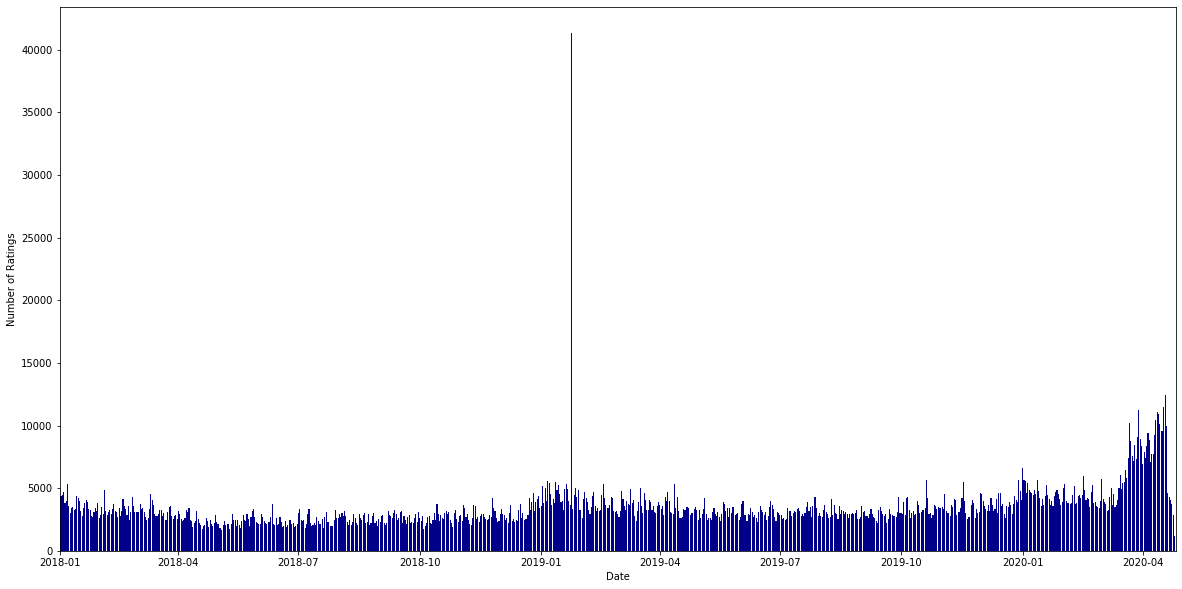

In [39]:
plt.gcf().set_size_inches(20, 10)
plt.bar(dailyratings['rating_timestamp_utc'],dailyratings['number_of_ratings'], color='darkblue')
plt.xlim(left=dt.date(2018, 1, 1), right=dt.date(2020,4,26))
plt.xlabel('Date')
plt.ylabel('Number of Ratings')
plt.show()

In [40]:
moviedata = ratingsdf.groupby(['movie_id'])['rating_id'].count().reset_index(name='count')
moviedata.head()

,movie_id,count
0,0,1
1,1,455
2,2,481
3,3,190
4,4,447


In [41]:
moviedata2 = pd.merge(moviedata, moviedf[['movie_id','movie_title','movie_release_year','movie_popularity']], on='movie_id', how='left')
moviedata2.head()

,movie_id,count,movie_title,movie_release_year,movie_popularity
0,0,1,NaN,NaN,NaN
1,1,455,La Antena,2007.0,105.0
2,2,481,Elementary Particles,2006.0,23.0
3,3,190,It's Winter,2006.0,21.0
4,4,447,Kirikou and the Wild Beasts,2005.0,46.0


In [42]:
#Top 10 by the Number of Ratings
moviedata2.sort_values('count', ascending=False).head(10)

,movie_id,count,movie_title,movie_release_year,movie_popularity
161,161,41494,Pulp Fiction,1994.0,13989.0
147,147,34786,A Clockwork Orange,1971.0,12400.0
891,918,34443,Fight Club,1999.0,9267.0
92,92,34012,Eternal Sunshine of the Spotless Mind,2004.0,9818.0
400,405,32251,The Shining,1980.0,11407.0
1643,1731,30403,The Dark Knight,2008.0,6776.0
481,488,30157,The Godfather,1972.0,13103.0
300,303,30094,2001: A Space Odyssey,1968.0,13881.0
316,320,29858,The Big Lebowski,1998.0,8831.0
204,204,29755,Taxi Driver,1976.0,11591.0


In [43]:
#Top 10 by movie_popularity score
moviedata2.sort_values('movie_popularity', ascending=False).head(10)

,movie_id,count,movie_title,movie_release_year,movie_popularity
161,161,41494,Pulp Fiction,1994.0,13989.0
300,303,30094,2001: A Space Odyssey,1968.0,13881.0
481,488,30157,The Godfather,1972.0,13103.0
147,147,34786,A Clockwork Orange,1971.0,12400.0
204,204,29755,Taxi Driver,1976.0,11591.0
400,405,32251,The Shining,1980.0,11407.0
1468,1537,24348,Apocalypse Now,1979.0,9861.0
92,92,34012,Eternal Sunshine of the Spotless Mind,2004.0,9818.0
148,148,25201,Psycho,1960.0,9685.0
311,315,22768,Dr. Strangelove or: How I Learned to Stop Worr...,1964.0,9657.0


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


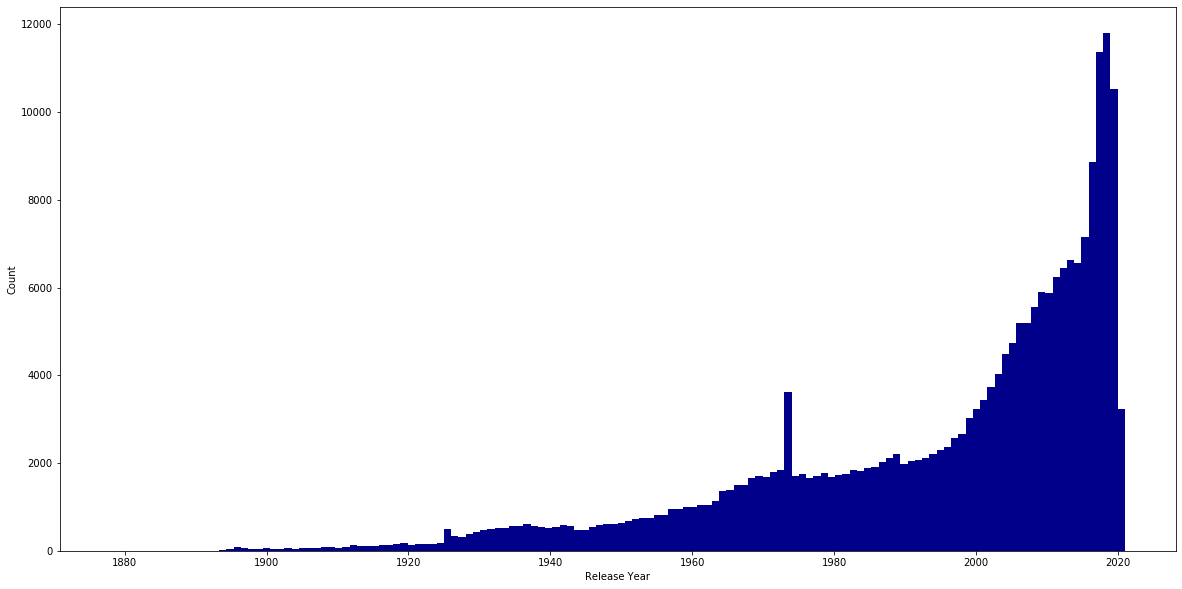

In [44]:
#Histogram of Number of movies by release_year

plt.gcf().set_size_inches(20, 10)
plt.hist(moviedf['movie_release_year'], color='darkblue',bins = 140)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [45]:
moviedata2['movie_popularity'].max()

13989.0

In [46]:
moviedata2['movie_popularity'].min()

0.0

In [47]:
moviedata2['movie_popularity'].mean()

20.358752032748274

In [48]:
moviedata2['movie_popularity'].describe()

count    142664.000000
mean         20.358752
std         223.153632
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max       13989.000000
Name: movie_popularity, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


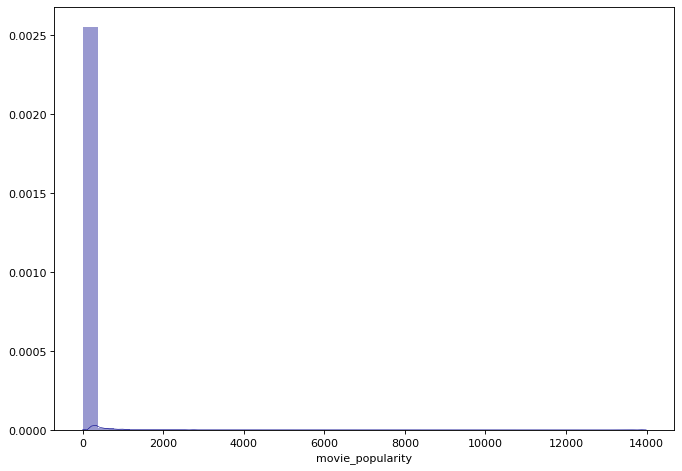

In [49]:
#Bar chart to show number of movies by movie_popularity

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(moviedata2['movie_popularity'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 0.5})

In [50]:
moviedf1 = moviedf[['movie_id','movie_title','movie_release_year','movie_popularity','director_name']]

In [51]:
rawdf = pd.merge(ratingsdf, moviedf1 , on='movie_id', how='left')
rawdf = pd.merge(rawdf, listdf4, on='user_id', how='left')

In [52]:
rawdf.head()

,movie_id,rating_id,rating_url,rating_score,rating_timestamp_utc,critic,critic_likes,critic_comments,user_id,user_trialist,user_subscriber,user_eligible_for_trial,user_has_payment_method,movie_title,movie_release_year,movie_popularity,director_name,list_count,comments_sum,followers_sum,list_movie_number,Creation_to_update_time
0,1066,15610495,http://mubi.com/films/pavee-lackeen-the-travel...,3.0,2017-06-10,NaN,0,0,41579158,False,False,True,False,Pavee Lackeen: The Traveller Girl,2005.0,1.0,Perry Ogden,NaN,NaN,NaN,NaN,NaN
1,1066,10704606,http://mubi.com/films/pavee-lackeen-the-travel...,2.0,2014-08-15,NaN,0,0,85981819,True,True,False,True,Pavee Lackeen: The Traveller Girl,2005.0,1.0,Perry Ogden,13.0,25.0,422.0,1176.0,3743.0
2,1066,10177114,http://mubi.com/films/pavee-lackeen-the-travel...,2.0,2014-01-30,NaN,0,0,4208563,False,False,True,True,Pavee Lackeen: The Traveller Girl,2005.0,1.0,Perry Ogden,12.0,5.0,21.0,2425.0,2461.0
3,1066,10130280,http://mubi.com/films/pavee-lackeen-the-travel...,3.0,2014-01-19,I am a bit disappointed by this documentary fi...,0,0,9820140,False,False,True,False,Pavee Lackeen: The Traveller Girl,2005.0,1.0,Perry Ogden,5.0,1.0,6.0,57.0,3152.0
4,1066,8357049,http://mubi.com/films/pavee-lackeen-the-travel...,4.0,2012-10-02,NaN,0,0,68654088,False,False,True,True,Pavee Lackeen: The Traveller Girl,2005.0,1.0,Perry Ogden,NaN,NaN,NaN,NaN,NaN


In [53]:
rawdf['rating_timestamp_utc'] = pd.to_datetime(rawdf.rating_timestamp_utc,format='%Y-%m-%d %H:%M:%S')
rawdf['critic'] = np.where(rawdf['critic'].isnull(), '0', '1')
rawdf['user_trialist'] = np.where(rawdf['user_trialist']==True, 1, 0)
rawdf['user_subscriber'] = np.where(rawdf['user_subscriber']==True, 1, 0)
rawdf['user_eligible_for_trial'] = np.where(rawdf['user_eligible_for_trial']==True, 1, 0)
rawdf['user_has_payment_method'] = np.where(rawdf['user_has_payment_method']==True, 1, 0)

rawdf.drop(['rating_id','rating_url'], axis=1, inplace=True)

In [54]:
rawdf.nunique()

movie_id                   142698
rating_score                    5
rating_timestamp_utc         4456
critic                          2
critic_likes                   66
critic_comments                51
user_id                    451757
user_trialist                   2
user_subscriber                 2
user_eligible_for_trial         2
user_has_payment_method         2
movie_title                126496
movie_release_year            138
movie_popularity             1286
director_name               58965
list_count                    120
comments_sum                  111
followers_sum                 382
list_movie_number            1368
Creation_to_update_time      3401
dtype: int64

In [55]:
rawdf.isnull().sum(axis=0)

movie_id                         0
rating_score                 26731
rating_timestamp_utc             0
critic                           0
critic_likes                     0
critic_comments                  0
user_id                          0
user_trialist                    0
user_subscriber                  0
user_eligible_for_trial          0
user_has_payment_method          0
movie_title                     34
movie_release_year              79
movie_popularity                34
director_name                   37
list_count                 9762323
comments_sum               9762323
followers_sum              9762323
list_movie_number          9762323
Creation_to_update_time    9762323
dtype: int64

In [56]:
rawdf.dtypes

movie_id                            int64
rating_score                      float64
rating_timestamp_utc       datetime64[ns]
critic                             object
critic_likes                        int64
critic_comments                     int64
user_id                             int64
user_trialist                       int64
user_subscriber                     int64
user_eligible_for_trial             int64
user_has_payment_method             int64
movie_title                        object
movie_release_year                float64
movie_popularity                  float64
director_name                      object
list_count                        float64
comments_sum                      float64
followers_sum                     float64
list_movie_number                 float64
Creation_to_update_time           float64
dtype: object

In [57]:
rawdf['movie_release_year'] = rawdf['movie_release_year'].astype(str).str.strip('.0')
rawdf['movie_release_year']

0           2005
1           2005
2           2005
3           2005
4           2005
            ... 
15520000    2006
15520001    2006
15520002    2006
15520003    2006
15520004    2006
Name: movie_release_year, Length: 15520005, dtype: object

In [58]:
#Ratings of the top 10 movies by number of ratings
rawdf2 = rawdf.groupby(['movie_id']).agg(count=('rating_score', 'count'), avg_rating=('rating_score', 'mean')).reset_index()
rawdf2.sort_values(['count','avg_rating'], ascending=False).head(10)

,movie_id,count,avg_rating
161,161,41435,4.391263
147,147,34738,4.345069
891,918,34420,4.134195
92,92,33969,4.142807
400,405,32221,4.322771
1643,1731,30382,4.066026
481,488,30120,4.574734
300,303,30050,4.493311
316,320,29828,4.189218
204,204,29732,4.384939


In [59]:
rawdf2['count'].mean()

108.5738692903895

In [60]:
#Top 10 movies with the highest avg ratings (movies with more than at least 108 ratings)
rawdf3 = rawdf2[(rawdf2['avg_rating'] < 5) & (rawdf2['count'] > 108)]
rawdf3.sort_values('avg_rating', ascending=False).head(10)

,movie_id,count,avg_rating
99547,161305,169,4.692308
97117,157951,327,4.685015
9706,23369,238,4.672269
1332,1393,1845,4.671003
9114,22742,750,4.658667
51878,92880,159,4.641509
111942,184461,325,4.640000
51876,92878,162,4.617284
2028,2142,3070,4.599674
720,743,2764,4.591172


In [61]:
#Top 10 movies with the lowest avg ratings (movies with more than at least 108 ratings)
rawdf3.sort_values('avg_rating', ascending=True).head(10)

,movie_id,count,avg_rating
26299,40939,195,1.117949
36948,56294,122,1.163934
42091,72486,200,1.195000
23018,37380,170,1.211765
5261,11087,130,1.230769
43491,77481,128,1.265625
29021,43960,181,1.281768
27825,42623,532,1.283835
40331,66485,124,1.298387
25839,40410,132,1.325758


In [62]:
dfuser0 = rawdf.copy()
dfuser0.drop(['movie_title','movie_release_year'], axis=1, inplace=True)
dfuser1 = pd.pivot_table(dfuser0,index=["user_id"],values=["movie_id"],aggfunc='count')
dfuser2 = pd.pivot_table(dfuser0,index=["user_id"],values=["movie_popularity","rating_score","list_count","comments_sum","followers_sum","Creation_to_update_time"])
dfuser3 = pd.pivot_table(dfuser0,index=["user_id"],values=["critic","critic_likes","critic_comments", "list_movie_number"],aggfunc=np.sum)
dfuser4 = pd.pivot_table(dfuser0,index=["user_id"],values=["user_trialist","user_subscriber"], aggfunc='first')
dfuser5 = pd.pivot_table(dfuser0,index=["user_id"],values=["director_name"], aggfunc=pd.Series.nunique)
dfuser6 = pd.pivot_table(dfuser0,index=["user_id"],values=["rating_timestamp_utc"], aggfunc=lambda x: (max(x)-min(x)).days)

In [63]:
dfuser = pd.merge(dfuser1, dfuser2, on="user_id", how='left')
dfuser = pd.merge(dfuser, dfuser3, on='user_id', how='left')
dfuser = pd.merge(dfuser, dfuser4, on='user_id', how='left')
dfuser = pd.merge(dfuser, dfuser5, on='user_id', how='left')
dfuser = pd.merge(dfuser, dfuser6, on='user_id', how='left')
dfuser = pd.merge(dfuser, ratingsdf3, on='user_id', how='left')
dfuser = pd.merge(dfuser, ratingsdf4, on='user_id', how='left').reset_index()
dfuser.head()

,index,user_id,movie_id,Creation_to_update_time,comments_sum,followers_sum,list_count,movie_popularity,rating_score,critic_comments,critic_likes,list_movie_number,user_subscriber,user_trialist,director_name,rating_timestamp_utc,top10count,1.0,2.0,3.0,4.0,5.0
0,0,57,1,NaN,NaN,NaN,NaN,124.000000,5.000000,0,0,0.0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,1.0
1,1,176,13,NaN,NaN,NaN,NaN,218.153846,3.538462,0,1,0.0,0,0,13,190,NaN,NaN,2.0,5.0,3.0,3.0
2,2,181,1,NaN,NaN,NaN,NaN,13103.000000,5.000000,0,0,0.0,0,0,1,0,1.0,NaN,NaN,NaN,NaN,1.0
3,3,499,1,NaN,NaN,NaN,NaN,752.000000,5.000000,0,0,0.0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,1.0
4,4,606,1,NaN,NaN,NaN,NaN,5802.000000,5.000000,0,0,0.0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,1.0


In [64]:
dfuser = dfuser.rename(columns = {"movie_id":"ratedmovies", "director_name":"directorcount", "list_movie_number":"movies_in_list", "rating_timestamp_utc":"rating_time"})
dfuser = dfuser.fillna(0)
dfuser['ratedperday'] = dfuser['ratedmovies'] / dfuser['rating_time']
dfuser = dfuser.replace([np.inf, -np.inf], np.nan)
dfuser = dfuser.fillna(0)
dfuser1 = dfuser.drop(['index'], axis=1).copy()
dfuser = dfuser[dfuser.user_id != 12295046] #dropping user 12295046 as this person data is an outlier
dfuser.drop(['index','rating_time','user_id'], axis=1, inplace=True)

In [65]:
dfuser1.head()

,user_id,ratedmovies,Creation_to_update_time,comments_sum,followers_sum,list_count,movie_popularity,rating_score,critic_comments,critic_likes,movies_in_list,user_subscriber,user_trialist,directorcount,rating_time,top10count,1.0,2.0,3.0,4.0,5.0,ratedperday
0,57,1,0.0,0.0,0.0,0.0,124.000000,5.000000,0,0,0.0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
1,176,13,0.0,0.0,0.0,0.0,218.153846,3.538462,0,1,0.0,0,0,13,190,0.0,0.0,2.0,5.0,3.0,3.0,0.068421
2,181,1,0.0,0.0,0.0,0.0,13103.000000,5.000000,0,0,0.0,0,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000
3,499,1,0.0,0.0,0.0,0.0,752.000000,5.000000,0,0,0.0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
4,606,1,0.0,0.0,0.0,0.0,5802.000000,5.000000,0,0,0.0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000


In [44]:
#Number of Users
dfuser1['user_id'].count()

451757

In [45]:
#Number of subscribers (unique)
dfuser1['user_subscriber'].sum()

104236

In [46]:
#Number of trialists (unique)
dfuser1['user_trialist'].sum()

36575

In [69]:
listusercount1 = dfuser1[dfuser1['list_count']>0]
#Number of subscribers who created at least one list
listusercount1['user_subscriber'].sum()

6058

In [70]:
#Number of trialists who created at least one list
listusercount1['user_trialist'].sum()

1763

In [72]:
#User with the most number of list followers(total)
dfuser1.sort_values('followers_sum', ascending = False).head(1)

,user_id,ratedmovies,Creation_to_update_time,comments_sum,followers_sum,list_count,movie_popularity,rating_score,critic_comments,critic_likes,movies_in_list,user_subscriber,user_trialist,directorcount,rating_time,top10count,1.0,2.0,3.0,4.0,5.0,ratedperday
278482,61596227,10342,3824.0,3438.0,46415.0,330.0,226.530748,3.313033,67,2106,359953310.0,0,0,4033,4065,10.0,369.0,1532.0,3947.0,3457.0,1023.0,2.544157


In [73]:
#User with the most number of lists
dfuser1.sort_values('list_count', ascending = False).head(1)

,user_id,ratedmovies,Creation_to_update_time,comments_sum,followers_sum,list_count,movie_popularity,rating_score,critic_comments,critic_likes,movies_in_list,user_subscriber,user_trialist,directorcount,rating_time,top10count,1.0,2.0,3.0,4.0,5.0,ratedperday
80775,17893708,6645,3815.0,220.0,643.0,1263.0,268.202257,3.094894,33,311,133405020.0,0,0,2755,4168,10.0,601.0,1185.0,2210.0,2269.0,374.0,1.59429


In [74]:
dfuser1.loc[np.logical_and(dfuser1.user_subscriber == 1, dfuser1.user_trialist == 1)]

,user_id,ratedmovies,Creation_to_update_time,comments_sum,followers_sum,list_count,movie_popularity,rating_score,critic_comments,critic_likes,movies_in_list,user_subscriber,user_trialist,directorcount,rating_time,top10count,1.0,2.0,3.0,4.0,5.0,ratedperday
8,1984,1,0.0,0.0,0.0,0.0,34.00000,3.000000,0,0,0.0,1,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
10,2329,1,0.0,0.0,0.0,0.0,180.00000,5.000000,0,0,0.0,1,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
11,2385,16,3.0,0.0,0.0,4.0,1388.06250,4.437500,0,0,7888.0,1,1,15,2,0.0,0.0,2.0,1.0,1.0,12.0,8.000000
32,8388,1,0.0,0.0,0.0,0.0,142.00000,2.000000,0,0,0.0,1,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
93,22822,1,0.0,0.0,0.0,0.0,1302.00000,4.000000,0,0,0.0,1,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451707,99989086,2,0.0,0.0,0.0,0.0,69.50000,5.000000,0,0,0.0,1,1,2,7,0.0,0.0,0.0,0.0,0.0,2.0,0.285714
451721,99993418,2,0.0,0.0,0.0,0.0,34.00000,1.500000,0,0,0.0,1,1,2,16,0.0,1.0,1.0,0.0,0.0,0.0,0.125000
451735,99996361,1,0.0,0.0,0.0,0.0,10.00000,3.000000,0,0,0.0,1,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
451737,99996903,63,0.0,0.0,0.0,0.0,532.31746,3.650794,0,0,0.0,1,1,50,80,0.0,2.0,5.0,21.0,20.0,15.0,0.787500


In [75]:
dfuser['ratedperday'].describe()

count    451756.000000
mean          0.697596
std          10.225598
min           0.000000
25%           0.000000
50%           0.000000
75%           0.034091
max        1257.000000
Name: ratedperday, dtype: float64

In [76]:
#Who rated the most number of movies?
dfuser1.sort_values('ratedmovies', ascending=False).head(20)

,user_id,ratedmovies,Creation_to_update_time,comments_sum,followers_sum,list_count,movie_popularity,rating_score,critic_comments,critic_likes,movies_in_list,user_subscriber,user_trialist,directorcount,rating_time,top10count,1.0,2.0,3.0,4.0,5.0,ratedperday
55572,12295046,19983,0.0,0.0,0.0,0.0,124.287644,1.392784,4,1,0.0,0,0,7378,1428,10.0,15609.0,2419.0,956.0,478.0,521.0,13.993697
11765,2591449,17053,0.0,0.0,0.0,0.0,149.021404,2.494458,3,15,0.0,0,0,5917,3087,10.0,2342.0,6472.0,6114.0,1715.0,410.0,5.524133
109254,24226320,11183,0.0,0.0,0.0,0.0,204.455513,3.367522,0,4,0.0,0,0,4089,886,10.0,658.0,1446.0,3610.0,4066.0,1403.0,12.621896
158679,35097747,11158,3448.0,23.0,52.0,2.0,182.720111,3.120721,14,89,4351620.0,0,0,4011,4187,10.0,28.0,2731.0,4270.0,4124.0,5.0,2.664915
415843,92027428,10544,0.0,0.0,0.0,0.0,162.272193,2.970789,26,844,0.0,1,0,3025,1403,7.0,644.0,1747.0,5791.0,1997.0,365.0,7.515324
416091,92084264,10497,2133.0,68.0,1632.0,57.0,218.801372,3.021720,1337,9738,152647374.0,1,1,3325,2166,10.0,2505.0,1501.0,1934.0,2375.0,2182.0,4.846260
147419,32621374,10363,0.0,0.0,0.0,0.0,210.854482,3.219531,0,11,0.0,0,0,5007,4034,10.0,90.0,1021.0,5907.0,3214.0,131.0,2.568914
278482,61596227,10342,3824.0,3438.0,46415.0,330.0,226.530748,3.313033,67,2106,359953310.0,0,0,4033,4065,10.0,369.0,1532.0,3947.0,3457.0,1023.0,2.544157
281467,62256786,10157,3383.0,5.0,50.0,2.0,226.179482,3.157029,57,562,1909516.0,0,0,3920,4123,10.0,1334.0,1472.0,3322.0,2312.0,1711.0,2.463497
106732,23662545,10135,3587.0,9.0,416.0,4.0,180.237198,2.936951,25,275,12911990.0,0,0,4883,3702,10.0,1482.0,1977.0,3019.0,3012.0,645.0,2.737709


User ID 19983 rated almost 20,000 movies but the average rating_score is 1.39
<br>The user rated 14 movies a day on average for 1428days.
<br>Is this user a bot or an internet troll?
<br>This person is not even a subscriber!

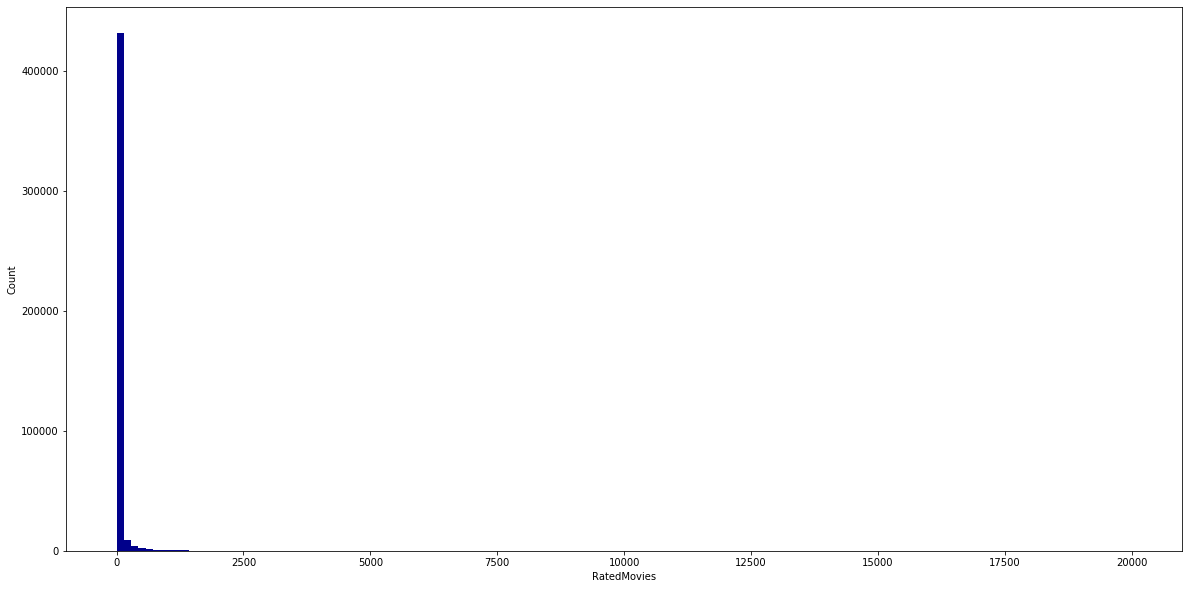

In [77]:
#Is it possible to rate more than 5000 movies? The ones who rated a lot of movies may be a movie lover, a serious movie critic, or MUBI employee!
plt.gcf().set_size_inches(20, 10)
plt.hist(dfuser1['ratedmovies'], color='darkblue',bins = 140)
plt.xlabel('RatedMovies')
plt.ylabel('Count')
plt.show()

In [78]:
#The mean of ratedmovies is 34. 
dfuser1['ratedmovies'].mean()

34.354763733600144

***
### Searching for the best model
***

### Logistic Regression
#### Predicting subscribers

In [52]:
x_vars_lr = dfuser.drop(['user_subscriber'], axis=1)
target_lr = dfuser[['user_subscriber']]

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split

features = StandardScaler().fit_transform(x_vars_lr)
pca = PCA(n_components= 10)
features_pca = pca.fit_transform(features)

In [54]:
sum(dfuser['user_subscriber'])/len(dfuser['user_subscriber'])

0.23073517562578028

Text(0, 0.5, 'cumulative explained variance')

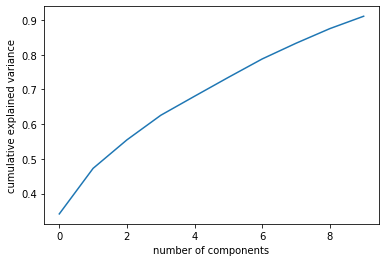

In [55]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [56]:
np.sum(pca.explained_variance_ratio_)

0.91058006992899

In [57]:
x_train, x_test, y_train, y_test = train_test_split(features_pca, 
                                                    target_lr, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [58]:
sum(y_train['user_subscriber'])/len(y_train['user_subscriber'])

0.23064492922048455

In [59]:
sum(y_test['user_subscriber'])/len(y_test['user_subscriber'])

0.23109615725163804

In [60]:
clf = LogisticRegressionCV(solver = 'saga',
                           penalty = 'elasticnet',
                           l1_ratios = [0.1, 0.2, 0.3],
                           Cs = 20,
                           n_jobs = -1,
                           max_iter = 2000,
                           random_state = 0,
                           cv = 10,
                          )

In [61]:
clf_model = clf.fit(x_train, y_train['user_subscriber'])

In [62]:
x_train_probs_s = clf_model.predict_proba(x_train)
x_test_probs_s = clf_model.predict_proba(x_test)

In [63]:
#Train probabilities
x_train_probs_df = pd.DataFrame(x_train_probs_s)
x_train_probs_df.columns = ['trainprobs' + str(col) for col in x_train_probs_df.columns]
x_train_probs_df.head()

,trainprobs0,trainprobs1
0,0.793819,0.206181
1,0.817048,0.182952
2,0.903133,0.096867
3,0.761435,0.238565
4,0.782836,0.217164


In [64]:
#Test probabilities
x_test_probs_df = pd.DataFrame(x_test_probs_s)
x_test_probs_df.columns = ['testprobs' + str(col) for col in x_test_probs_df.columns]
x_test_probs_df.head()

,testprobs0,testprobs1
0,0.090610,0.909390
1,0.959237,0.040763
2,0.941376,0.058624
3,0.762415,0.237585
4,0.762344,0.237656


In [65]:
fpr, tpr, thresholds = metrics.roc_curve(y_train['user_subscriber'], x_train_probs_df['trainprobs1'])
metrics.auc(fpr, tpr)

0.7790361385669031

In [66]:
fpr, tpr, thresholds = metrics.roc_curve(y_test['user_subscriber'], x_test_probs_df['testprobs1'])
metrics.auc(fpr, tpr)

0.7780118779902616

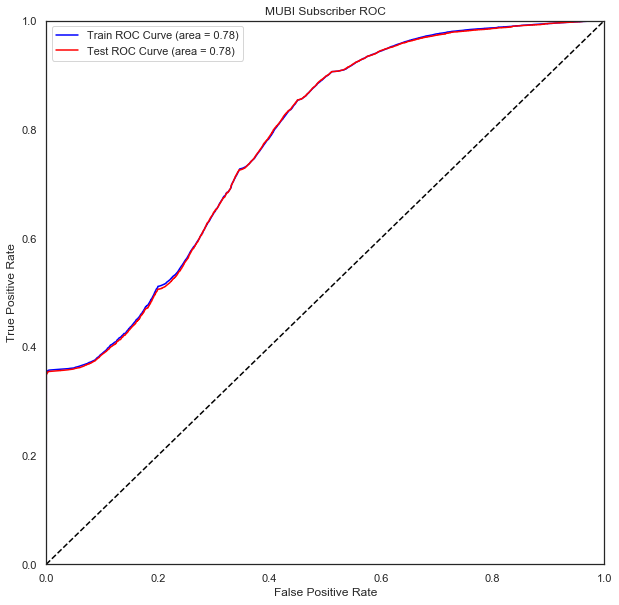

In [67]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(10,10)})

plt.plot(roc_curve(y_train['user_subscriber'], x_train_probs_df['trainprobs1'])[0], roc_curve(y_train['user_subscriber'], x_train_probs_df['trainprobs1'])[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train['user_subscriber'], x_train_probs_df['trainprobs1']))

plt.plot(roc_curve(y_test['user_subscriber'], x_test_probs_df['testprobs1'])[0],roc_curve(y_test['user_subscriber'], x_test_probs_df['testprobs1'])[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test['user_subscriber'], x_test_probs_df['testprobs1']))

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MUBI Subscriber ROC')
plt.legend()
plt.show()

### Logistic Regression
#### Predicting trialists

In [68]:
x_vars_lr_2 = dfuser.drop(['user_subscriber', 'user_trialist'], axis=1)
target_lr_2 = dfuser[['user_trialist']]

In [69]:
features = StandardScaler().fit_transform(x_vars_lr_2)
pca = PCA(n_components= 10)
features_pca = pca.fit_transform(features)

In [70]:
sum(dfuser['user_trialist'])/len(dfuser['user_trialist'])

0.08096184666058669

Text(0, 0.5, 'cumulative explained variance')

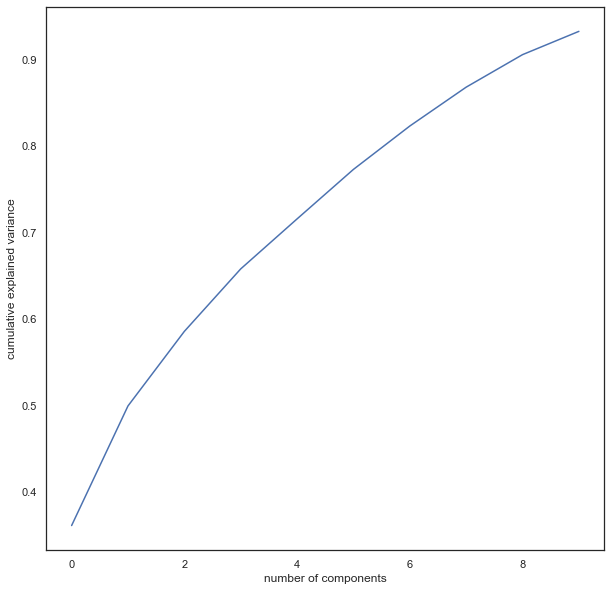

In [71]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [72]:
np.sum(pca.explained_variance_ratio_)

0.9325202129087038

In [73]:
x_train, x_test, y_train, y_test = train_test_split(features_pca, 
                                                    target_lr_2, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [74]:
sum(y_train['user_trialist'])/len(y_train['user_trialist'])

0.08104503547276731

In [75]:
sum(y_test['user_trialist'])/len(y_test['user_trialist'])

0.08062909509474057

In [76]:
clf = LogisticRegressionCV(solver = 'saga',
                           penalty = 'elasticnet',
                           l1_ratios = [0.1, 0.2, 0.3],
                           Cs = 20,
                           n_jobs = -1,
                           max_iter = 1000,
                           random_state = 0,
                           cv = 10,
                          )

In [77]:
clf_model = clf.fit(x_train, y_train['user_trialist'])

In [78]:
x_train_probs_s = clf_model.predict_proba(x_train)
x_test_probs_s = clf_model.predict_proba(x_test)

In [79]:
#Train probabilities
x_train_probs_df = pd.DataFrame(x_train_probs_s)
x_train_probs_df.columns = ['trainprobs' + str(col) for col in x_train_probs_df.columns]
x_train_probs_df.head()

,trainprobs0,trainprobs1
0,0.902024,0.097976
1,0.933069,0.066931
2,0.955913,0.044087
3,0.885062,0.114938
4,0.897273,0.102727


In [80]:
#Test probabilities
x_test_probs_df = pd.DataFrame(x_test_probs_s)
x_test_probs_df.columns = ['testprobs' + str(col) for col in x_test_probs_df.columns]
x_test_probs_df.head()

,testprobs0,testprobs1
0,0.900467,0.099533
1,0.981289,0.018711
2,0.973705,0.026295
3,0.885584,0.114416
4,0.885689,0.114311


In [81]:
fpr, tpr, thresholds = metrics.roc_curve(y_train['user_trialist'], x_train_probs_df['trainprobs1'])
metrics.auc(fpr, tpr)

0.6371817096525981

In [82]:
fpr, tpr, thresholds = metrics.roc_curve(y_test['user_trialist'], x_test_probs_df['testprobs1'])
metrics.auc(fpr, tpr)

0.6369653346205661

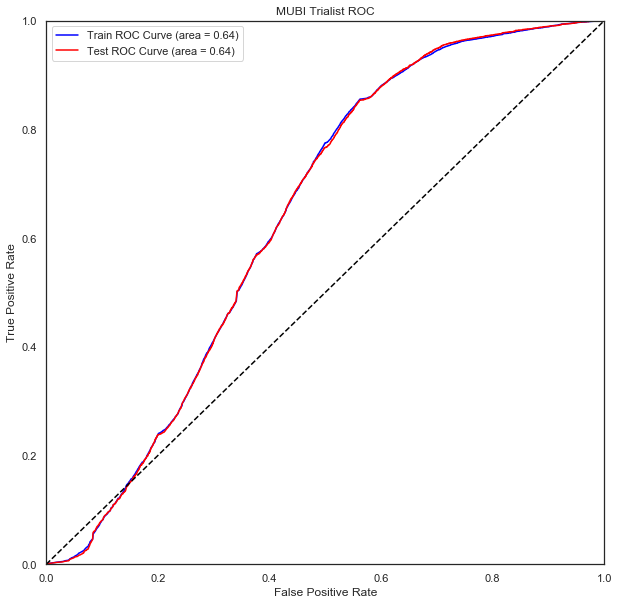

In [83]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(10,10)})

plt.plot(roc_curve(y_train['user_trialist'], x_train_probs_df['trainprobs1'])[0], roc_curve(y_train['user_trialist'], x_train_probs_df['trainprobs1'])[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train['user_trialist'], x_train_probs_df['trainprobs1']))

plt.plot(roc_curve(y_test['user_trialist'], x_test_probs_df['testprobs1'])[0],roc_curve(y_test['user_trialist'], x_test_probs_df['testprobs1'])[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test['user_trialist'], x_test_probs_df['testprobs1']))

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MUBI Trialist ROC')
plt.legend()
plt.show()

### Random Forest
#### Predicting subscribers

In [84]:
from sklearn.ensemble import RandomForestClassifier


x_vars_rf = dfuser.drop(['user_subscriber'], axis=1)
target_rf = dfuser[['user_subscriber']]

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x_vars_rf, 
                                                    target_rf['user_subscriber'], 
                                                    test_size=0.2, 
                                                    random_state=1)

In [86]:
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)

In [88]:
from sklearn.model_selection import GridSearchCV
random_params = {'criterion': ['gini', 'entropy'],
                 'max_features': [5,10,'auto'],
                 'max_depth': [5,10,None],
                 'min_samples_leaf': [1,2,4,8],
                 'min_samples_split': [2,5,10],
                 'min_impurity_decrease': [0.001, 0.01, 0.05, 0.1],
                 'n_estimators': [5,10,20]}

rf_clf2 = GridSearchCV(estimator=rf_clf, param_grid=random_params)
rf_clf_model = rf_clf2.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [89]:
rf_train_probs = rf_clf_model.predict_proba(x_train)
rf_test_probs = rf_clf_model.predict_proba(x_test)

In [90]:
rf_train_prob_cols = ['class', 'proba']

In [91]:
rf_preds_train = pd.DataFrame(rf_train_probs, columns=rf_train_prob_cols)
rf_preds_test = pd.DataFrame(rf_test_probs, columns=rf_train_prob_cols)

In [92]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train, rf_preds_train['proba'])
metrics.auc(fpr, tpr)

0.8756750199493556

In [93]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_preds_test['proba'])
metrics.auc(fpr, tpr)

0.8725002860244365

### Random Forest
#### Predicting trialists

In [94]:
x_vars_rf_2 = dfuser.drop(['user_subscriber','user_trialist'], axis=1)
target_rf_2 = dfuser[['user_trialist']]

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x_vars_rf_2, 
                                                    target_rf_2['user_trialist'], 
                                                    test_size=0.2, 
                                                    random_state=1)

In [96]:
from sklearn.model_selection import GridSearchCV
random_params = {'criterion': ['gini', 'entropy'],
                 'max_features': [5,10,'auto'],
                 'max_depth': [5,10,None],
                 'min_samples_leaf': [1,2,4,8],
                 'min_samples_split': [2,5,10],
                 'min_impurity_decrease': [0.001, 0.01, 0.05, 0.1],
                 'n_estimators': [5,10,20]}

rf_clf2 = GridSearchCV(estimator=rf_clf, param_grid=random_params)
rf_clf_model = rf_clf2.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [97]:
rf_train_probs = rf_clf_model.predict_proba(x_train)
rf_test_probs = rf_clf_model.predict_proba(x_test)

In [98]:
rf_train_prob_cols = ['class', 'proba']

In [99]:
rf_preds_train = pd.DataFrame(rf_train_probs, columns=rf_train_prob_cols)
rf_preds_test = pd.DataFrame(rf_test_probs, columns=rf_train_prob_cols)

In [100]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, rf_preds_train['proba'])
metrics.auc(fpr, tpr)

0.682806204584249

In [101]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_preds_test['proba'])
metrics.auc(fpr, tpr)

0.6803598122523401

### XGBoost
#### Predicting subscribers

In [102]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

xg_vars = dfuser.drop(['user_subscriber'], axis=1)
xg_target = dfuser[['user_subscriber']]

In [103]:
x_train, x_test, y_train, y_test = train_test_split(xg_vars, 
                                                    xg_target['user_subscriber'], 
                                                    test_size=0.2, 
                                                    random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

In [104]:
dtrain = xgb.DMatrix(data = x_train, label = y_train)
dval = xgb.DMatrix(data = x_val, label = y_val)
dtest = xgb.DMatrix(data = x_test, label = y_test)

In [105]:
import hyperopt as hp
from hyperopt import Trials,fmin,STATUS_OK

In [106]:
xgb_space = {
    'booster': hp.hp.choice('booster',  ['gbtree']),
    'eta': hp.hp.loguniform('learning_rate', -4, 0),
    'max_depth':hp.hp.choice('max_depth', np.arange(10, 300,1, dtype=int)),
    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.05),
    'colsample_bytree':hp.hp.quniform('colsample_bytree',0.5,1.0,0.05),
    'min_child_weight':hp.hp.quniform('min_child_weight', 100, 1000,100),
    'lambda': hp.hp.uniform('lambda', 0.0, 100.0),
    'alpha': hp.hp.uniform('alpha', 0.0, 100.0),
    'gamma' : hp.hp.uniform('gamma', 0.0, 100.0),
    'scale_pos_weight': hp.hp.uniform('scale_pos_weight', 1.0, 10.0),
    'eval_metric' : hp.hp.choice('eval_metric', ['auc'])
    }

In [107]:
def objective_m(params, n_folds=5):


    model = xgb.cv(params = params,
              dtrain = dtrain,
              num_boost_round = 10,
              early_stopping_rounds = 10,
             nfold = n_folds)
    
    loss = 1 - max(model['test-auc-mean'])
    
    return loss


trials = Trials()
MAX_EVALS = 100
xgb_best_m = fmin(fn = objective_m, space = xgb_space, algo = hp.tpe.suggest, 
max_evals = MAX_EVALS, trials = trials)

100%|██████████| 100/100 [47:30<00:00, 28.51s/trial, best loss: 0.10022860000000011]


In [108]:
xgb_best_m

{'alpha': 9.73403259447976,
 'booster': 0,
 'colsample_bytree': 0.9500000000000001,
 'eval_metric': 0,
 'gamma': 3.0053741455927394,
 'lambda': 5.008395799239111,
 'learning_rate': 0.22504776777886853,
 'max_depth': 249,
 'min_child_weight': 100.0,
 'scale_pos_weight': 6.95092572847277,
 'subsample': 0.75}

In [109]:
param = {
 'booster' : 'gbtree',
 'eval_metric': 'auc',
 'n_thread': -1,
 'verbose': -1,
 'alpha': 9.73403259447976,
 'colsample_bytree': 0.9500000000000001,
 'gamma': 3.0053741455927394,
 'lambda': 5.008395799239111,
 'learning_rate': 0.22504776777886853,
 'max_depth': 249,
 'min_child_weight': 100.0,
 'scale_pos_weight': 6.95092572847277,
 'subsample': 0.75
 }

watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 200
bst = xgb.train(param, dtrain, num_round, evals = watchlist, early_stopping_rounds = 10)

[08:58:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_thread, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.89910	eval-auc:0.89434
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.89719	eval-auc:0.89297
[2]	train-auc:0.90193	eval-auc:0.89741
[3]	train-auc:0.90410	eval-auc:0.89931
[4]	train-auc:0.90561	eval-auc:0.90013
[5]	train-auc:0.90652	eval-auc:0.90075
[6]	train-auc:0.90717	eval-auc:0.90111
[7]	train-auc:0.90730	eval-auc:0.90103
[8]	train-auc:0.90795	eval-auc:0.90121
[9]	train-auc:0.90843	eval-auc:0.90145
[10]	train-auc:0.90906	eval-auc:0.90158
[11]	train-auc:0.90948	eval-auc:0.90167
[12]	train-auc:0.91003

In [110]:
train_w_preds = x_train.copy()
train_w_preds['xgb_probs'] = bst.predict(dtrain)

test_w_preds = x_test.copy()
test_w_preds['xgb_probs'] = bst.predict(dtest)

In [111]:
y2 = y_train
y = y_test
scores2 = train_w_preds['xgb_probs']
scores = test_w_preds['xgb_probs']

In [112]:
#Train
fpr, tpr, thresholds = metrics.roc_curve(y2, scores2)
metrics.auc(fpr, tpr)

0.9145971473425927

In [113]:
#Test
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
metrics.auc(fpr, tpr)

0.9000743301609645

In [114]:
import shap

In [115]:
model_barr = bst.save_raw()[4:]
bst.save_raw = lambda: model_barr

In [116]:
xgb_shap_explainer = shap.TreeExplainer(bst)

In [117]:
xgb_shap_vals_train = xgb_shap_explainer.shap_values(x_train)

In [118]:
xgb_shap_vals_test = xgb_shap_explainer.shap_values(x_test)

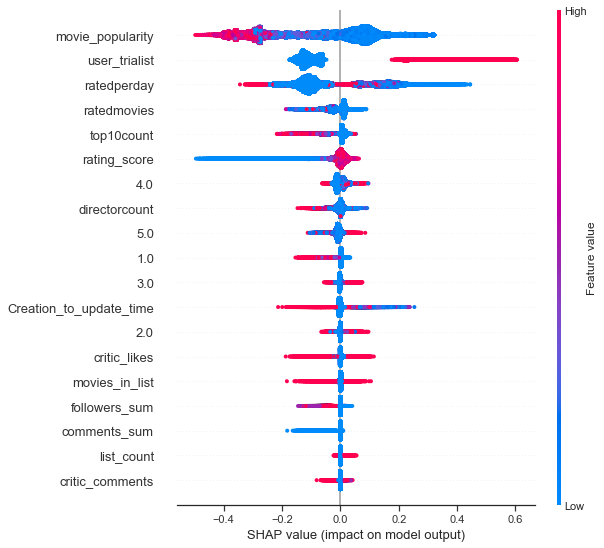

In [119]:
shap.summary_plot(xgb_shap_vals_train, x_train)

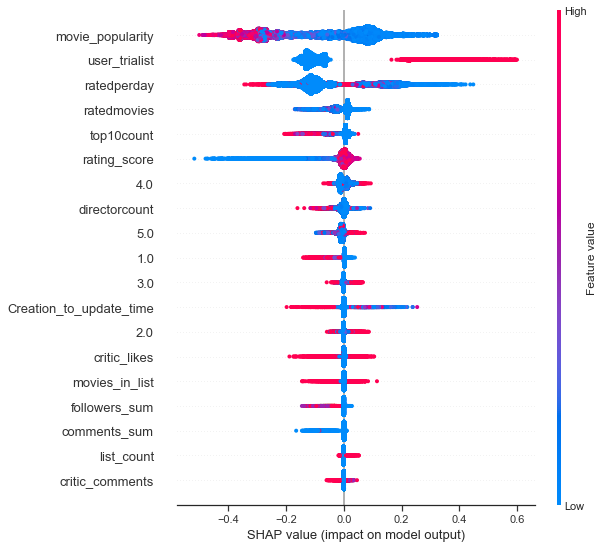

In [120]:
shap.summary_plot(xgb_shap_vals_test, x_test)

### XGBoost
#### Predicting trialists

In [121]:
xg_vars_2 = dfuser.drop(['user_trialist','user_subscriber'], axis=1)
xg_target_2 = dfuser[['user_trialist']]

In [122]:
x_train, x_test, y_train, y_test = train_test_split(xg_vars_2, 
                                                    xg_target_2['user_trialist'], 
                                                    test_size=0.2, 
                                                    random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

In [123]:
dtrain = xgb.DMatrix(data = x_train, label = y_train)
dval = xgb.DMatrix(data = x_val, label = y_val)
dtest = xgb.DMatrix(data = x_test, label = y_test)

In [124]:
xgb_space = {
    'booster': hp.hp.choice('booster',  ['gbtree']),
    'eta': hp.hp.loguniform('learning_rate', -4, 0),
    'max_depth':hp.hp.choice('max_depth', np.arange(10, 300,1, dtype=int)),
    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.05),
    'colsample_bytree':hp.hp.quniform('colsample_bytree',0.5,1.0,0.05),
    'min_child_weight':hp.hp.quniform('min_child_weight', 100, 1000,100),
    'lambda': hp.hp.uniform('lambda', 0.0, 100.0),
    'alpha': hp.hp.uniform('alpha', 0.0, 100.0),
    'gamma' : hp.hp.uniform('gamma', 0.0, 100.0),
    'scale_pos_weight': hp.hp.uniform('scale_pos_weight', 1.0, 10.0),
    'eval_metric' : hp.hp.choice('eval_metric', ['auc'])
    }

In [125]:
def objective_m(params, n_folds=5):


    model = xgb.cv(params = params,
              dtrain = dtrain,
              num_boost_round = 10,
              early_stopping_rounds = 10,
             nfold = n_folds)
    
    loss = 1 - max(model['test-auc-mean'])
    
    return loss


trials = Trials()
MAX_EVALS = 100
xgb_best_m = fmin(fn = objective_m, space = xgb_space, algo = hp.tpe.suggest, 
max_evals = MAX_EVALS, trials = trials)

100%|██████████| 100/100 [42:39<00:00, 25.59s/trial, best loss: 0.20929720000000007]


In [126]:
xgb_best_m

{'alpha': 13.17439157027529,
 'booster': 0,
 'colsample_bytree': 0.65,
 'eval_metric': 0,
 'gamma': 0.43029807667408876,
 'lambda': 4.616378764332115,
 'learning_rate': 0.40835569856416476,
 'max_depth': 235,
 'min_child_weight': 100.0,
 'scale_pos_weight': 4.291057314814259,
 'subsample': 1.0}

In [150]:
param = {
 'booster' : 'gbtree',
 'eval_metric': 'auc',
 'n_thread': -1,
 'verbose': -1,
 'alpha': 13.17439157027529,
 'colsample_bytree': 0.65,
 'gamma': 0.43029807667408876,
 'lambda': 4.616378764332115,
 'learning_rate': 0.40835569856416476,
 'max_depth': 235,
 'min_child_weight': 200.0,
 'scale_pos_weight': 4.291057314814259,
 'subsample': 0.2
 }

watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 200
bst = xgb.train(param, dtrain, num_round, evals = watchlist, early_stopping_rounds = 10)

[10:14:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_thread, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.75094	eval-auc:0.74558
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.75885	eval-auc:0.75390
[2]	train-auc:0.75892	eval-auc:0.75304
[3]	train-auc:0.76959	eval-auc:0.76328
[4]	train-auc:0.77543	eval-auc:0.76803
[5]	train-auc:0.77953	eval-auc:0.77170
[6]	train-auc:0.78075	eval-auc:0.77190
[7]	train-auc:0.78161	eval-auc:0.77267
[8]	train-auc:0.78322	eval-auc:0.77328
[9]	train-auc:0.78600	eval-auc:0.77428
[10]	train-auc:0.78787	eval-auc:0.77580
[11]	train-auc:0.78846	eval-auc:0.77579
[12]	train-auc:0.78886

In [151]:
train_w_preds = x_train.copy()
train_w_preds['xgb_probs'] = bst.predict(dtrain)

test_w_preds = x_test.copy()
test_w_preds['xgb_probs'] = bst.predict(dtest)

In [152]:
y2 = y_train
y = y_test
scores2 = train_w_preds['xgb_probs']
scores = test_w_preds['xgb_probs']

In [153]:
#Train
fpr, tpr, thresholds = metrics.roc_curve(y2, scores2)
metrics.auc(fpr, tpr)

0.8061569540928564

In [154]:
#Test
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
metrics.auc(fpr, tpr)

0.7795717498850416

In [155]:
model_barr = bst.save_raw()[4:]
bst.save_raw = lambda: model_barr

In [156]:
xgb_shap_explainer = shap.TreeExplainer(bst)
xgb_shap_vals_train = xgb_shap_explainer.shap_values(x_train)
xgb_shap_vals_test = xgb_shap_explainer.shap_values(x_test)

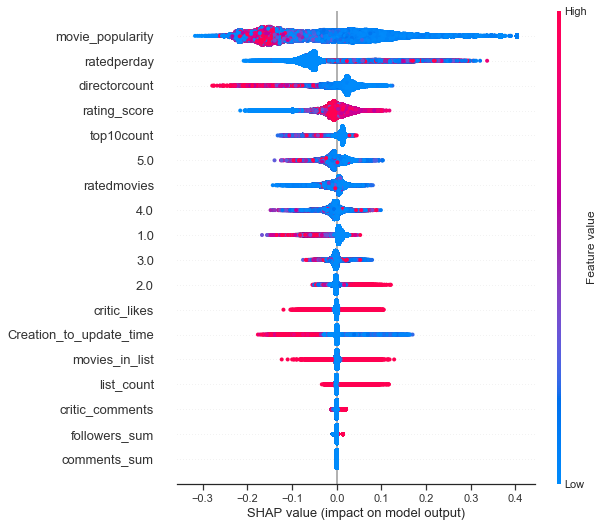

In [157]:
shap.summary_plot(xgb_shap_vals_train, x_train)

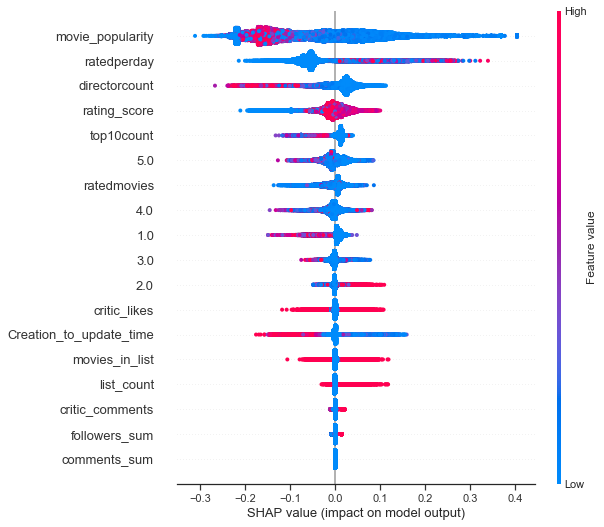

In [158]:
shap.summary_plot(xgb_shap_vals_test, x_test)

### LightGBM
#### Predicting subscribers

In [159]:
lgbm_vars = dfuser.drop(['user_subscriber'], axis=1)
lgbm_target = dfuser[['user_subscriber']]

In [160]:
x_train, x_test, y_train, y_test = train_test_split(lgbm_vars, 
                                                    lgbm_target['user_subscriber'], 
                                                    test_size=0.2, 
                                                    random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

In [161]:
import lightgbm as lgb
lightgbm_hp_train = lgb.Dataset(x_train, y_train)
lightgbm_hp_val = lgb.Dataset(x_val, y_val)

In [162]:
lgbm_space = {
    'boosting_type': hp.hp.choice('boosting_type',  ['gbdt']),
    'num_leaves':hp.hp.choice('num_leaves', np.arange(10, 100,20, dtype=int)),
    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.1),
    'colsample_bytree':hp.hp.quniform('colsample_bytree',0.5,1.0,0.1),
    'min_child_weight':hp.hp.quniform('min_child_weight', 100, 1000,100),
    'reg_alpha': hp.hp.uniform('reg_alpha', 0.0, 100.0),
    'reg_lambda': hp.hp.uniform('reg_lambda', 0.0, 100.0),
    'learning_rate': hp.hp.loguniform('learning_rate', -4, 0),
    'feature_fraction': hp.hp.loguniform('feature_fraction', -4, 0),
    'bagging_fraction': hp.hp.loguniform('bagging_fraction', -4, 0),
    'bagging_freq':hp.hp.choice('bagging_freq', np.arange(10, 100,20, dtype=int)),
    'drop_rate': hp.hp.loguniform('drop_rate', -4, 0),
    'scale_pos_weight': hp.hp.uniform('scale_pos_weight', 6.0, 10.0),   
    'metric' : 'auc',
    'max_bin': 512,
    'verbose' : -1
    }

In [163]:
def objective_m(params, n_folds=5):


    model = lgb.cv(params = params,
              train_set = lightgbm_hp_train,
              num_boost_round = 10000,
              early_stopping_rounds = 10,
             nfold = n_folds)
    
    loss = 1 - (max(model['auc-mean']))
    return loss


trials = Trials()
MAX_EVALS = 100
lgbm_best_m = fmin(fn = objective_m, space = lgbm_space, algo = hp.tpe.suggest, 
max_evals = MAX_EVALS)

[LightGBM] [Warning]                                   
feature_fraction is set=0.2820902751315604, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.2820902751315604
[LightGBM] [Warning]                                   
bagging_fraction is set=0.4632082732429255, subsample=0.9 will be ignored. Current value: bagging_fraction=0.4632082732429255
100%|██████████| 100/100 [1:09:13<00:00, 41.53s/trial, best loss: 0.10368530635493955]


In [164]:
lgbm_best_m

{'bagging_fraction': 0.8685851158594278,
 'bagging_freq': 2,
 'boosting_type': 0,
 'colsample_bytree': 0.5,
 'drop_rate': 0.29542323038913776,
 'feature_fraction': 0.9986134012515208,
 'learning_rate': 0.045718703959723155,
 'min_child_weight': 200.0,
 'num_leaves': 2,
 'reg_alpha': 11.862300075241777,
 'reg_lambda': 51.98982574170786,
 'scale_pos_weight': 9.333177033777329,
 'subsample': 0.6000000000000001}

In [165]:
lgbm_params = {'bagging_fraction': 0.8685851158594278,
 'bagging_freq': 2,
 'metric' : 'auc',
 'boosting_type': 'gbdt',
 'objective' : 'binary',
 'colsample_bytree': 0.5,
 'drop_rate': 0.29542323038913776,
 'feature_fraction': 0.9986134012515208,
 'learning_rate': 0.045718703959723155,
 'min_child_weight': 200.0,
 'num_leaves': 2,
 'reg_alpha': 11.862300075241777,
 'reg_lambda': 51.98982574170786,
 'scale_pos_weight': 9.333177033777329,
 'subsample': 0.6000000000000001,
 'verbose': -1,
 'early_stopping_round': 10}

In [166]:
lgb_gbm_auc = lgb.train(params = lgbm_params, train_set = lightgbm_hp_train,
                num_boost_round = 2000, valid_sets = [lightgbm_hp_val, lightgbm_hp_train],
               valid_names = ['Evaluation', 'Train'])

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')


[1]	Train's auc: 0.64116	Evaluation's auc: 0.640156
Training until validation scores don't improve for 10 rounds
[2]	Train's auc: 0.643016	Evaluation's auc: 0.642172
[3]	Train's auc: 0.756871	Evaluation's auc: 0.755884
[4]	Train's auc: 0.758695	Evaluation's auc: 0.757758
[5]	Train's auc: 0.76148	Evaluation's auc: 0.760598
[6]	Train's auc: 0.760975	Evaluation's auc: 0.760056
[7]	Train's auc: 0.761184	Evaluation's auc: 0.760241
[8]	Train's auc: 0.761184	Evaluation's auc: 0.760241
[9]	Train's auc: 0.764201	Evaluation's auc: 0.763599
[10]	Train's auc: 0.764356	Evaluation's auc: 0.763778
[11]	Train's auc: 0.831544	Evaluation's auc: 0.830684
[12]	Train's auc: 0.835266	Evaluation's auc: 0.834955
[13]	Train's auc: 0.831639	Evaluation's auc: 0.830783
[14]	Train's auc: 0.833482	Evaluation's auc: 0.833009
[15]	Train's auc: 0.833482	Evaluation's auc: 0.833009
[16]	Train's auc: 0.835548	Evaluation's auc: 0.835262
[17]	Train's auc: 0.835666	Evaluation's auc: 0.835268
[18]	Train's auc: 0.837768	Evalu

[156]	Train's auc: 0.868472	Evaluation's auc: 0.869728
Early stopping, best iteration is:
[146]	Train's auc: 0.86853	Evaluation's auc: 0.869745


In [167]:
y_probs_train = lgb_gbm_auc.predict(x_train)
y_probs_test = lgb_gbm_auc.predict(x_test)

In [168]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_probs_train)
metrics.auc(fpr, tpr)

0.8685303073958983

In [169]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs_test)
metrics.auc(fpr, tpr)

0.865774398994341

### LightGBM
#### Predicting trialists

In [170]:
lgbm_vars_2 = dfuser.drop(['user_subscriber', 'user_trialist'], axis=1)
lgbm_target_2 = dfuser[['user_trialist']]

In [171]:
x_train, x_test, y_train, y_test = train_test_split(lgbm_vars_2, 
                                                    lgbm_target_2['user_trialist'], 
                                                    test_size=0.2, 
                                                    random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

In [172]:
lightgbm_hp_train = lgb.Dataset(x_train, y_train)
lightgbm_hp_val = lgb.Dataset(x_val, y_val)

In [173]:
lgbm_space = {
    'boosting_type': hp.hp.choice('boosting_type',  ['gbdt']),
    'num_leaves':hp.hp.choice('num_leaves', np.arange(10, 100,20, dtype=int)),
    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.1),
    'colsample_bytree':hp.hp.quniform('colsample_bytree',0.5,1.0,0.1),
    'min_child_weight':hp.hp.quniform('min_child_weight', 100, 1000,100),
    'reg_alpha': hp.hp.uniform('reg_alpha', 0.0, 100.0),
    'reg_lambda': hp.hp.uniform('reg_lambda', 0.0, 100.0),
    'learning_rate': hp.hp.loguniform('learning_rate', -4, 0),
    'feature_fraction': hp.hp.loguniform('feature_fraction', -4, 0),
    'bagging_fraction': hp.hp.loguniform('bagging_fraction', -4, 0),
    'bagging_freq':hp.hp.choice('bagging_freq', np.arange(10, 100,20, dtype=int)),
    'drop_rate': hp.hp.loguniform('drop_rate', -4, 0),
    'scale_pos_weight': hp.hp.uniform('scale_pos_weight', 6.0, 10.0),   
    'metric' : 'auc',
    'max_bin': 512,
    'verbose' : -1
    }

In [174]:
def objective_m(params, n_folds=5):


    model = lgb.cv(params = params,
              train_set = lightgbm_hp_train,
              num_boost_round = 10000,
              early_stopping_rounds = 10,
             nfold = n_folds)
    
    loss = 1 - (max(model['auc-mean']))
    return loss


trials = Trials()
MAX_EVALS = 100
lgbm_best_m = fmin(fn = objective_m, space = lgbm_space, algo = hp.tpe.suggest, 
max_evals = MAX_EVALS)

[LightGBM] [Warning]                                   
feature_fraction is set=0.056307154549585556, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.056307154549585556
[LightGBM] [Warning]                                   
bagging_fraction is set=0.48879832726256667, subsample=0.7000000000000001 will be ignored. Current value: bagging_fraction=0.48879832726256667
100%|██████████| 100/100 [38:15<00:00, 22.96s/trial, best loss: 0.21520544144807308]


In [175]:
lgbm_best_m

{'bagging_fraction': 0.8644732069030372,
 'bagging_freq': 4,
 'boosting_type': 0,
 'colsample_bytree': 0.5,
 'drop_rate': 0.8215999334353952,
 'feature_fraction': 0.5913874958941221,
 'learning_rate': 0.021458371411116096,
 'min_child_weight': 200.0,
 'num_leaves': 3,
 'reg_alpha': 12.571460104634486,
 'reg_lambda': 15.857520815755482,
 'scale_pos_weight': 8.935812761796052,
 'subsample': 0.5}

In [176]:
lgbm_params = { 'bagging_fraction': 0.8644732069030372,
 'bagging_freq': 4,
 'metric' : 'auc',
 'boosting_type': 'gbdt',
 'objective' : 'binary',
 'colsample_bytree': 0.5,
 'drop_rate': 0.8215999334353952,
 'feature_fraction': 0.5913874958941221,
 'learning_rate': 0.021458371411116096,
 'min_child_weight': 200.0,
 'num_leaves': 3,
 'reg_alpha': 12.571460104634486,
 'reg_lambda': 15.857520815755482,
 'scale_pos_weight': 8.935812761796052,
 'subsample': 0.5,
 'verbose': -1,
 'early_stopping_round': 10}

In [177]:
lgb_gbm_auc = lgb.train(params = lgbm_params, train_set = lightgbm_hp_train,
                num_boost_round = 1000, valid_sets = [lightgbm_hp_val, lightgbm_hp_train],
               valid_names = ['Evaluation', 'Train'])

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')


[1]	Train's auc: 0.668959	Evaluation's auc: 0.668075
Training until validation scores don't improve for 10 rounds
[2]	Train's auc: 0.672504	Evaluation's auc: 0.67069
[3]	Train's auc: 0.672512	Evaluation's auc: 0.670685
[4]	Train's auc: 0.675476	Evaluation's auc: 0.673772
[5]	Train's auc: 0.701676	Evaluation's auc: 0.699853
[6]	Train's auc: 0.705687	Evaluation's auc: 0.704319
[7]	Train's auc: 0.706258	Evaluation's auc: 0.704952
[8]	Train's auc: 0.722918	Evaluation's auc: 0.722089
[9]	Train's auc: 0.722956	Evaluation's auc: 0.72213
[10]	Train's auc: 0.722987	Evaluation's auc: 0.72212
[11]	Train's auc: 0.723968	Evaluation's auc: 0.723176
[12]	Train's auc: 0.72397	Evaluation's auc: 0.723205
[13]	Train's auc: 0.723649	Evaluation's auc: 0.723223
[14]	Train's auc: 0.723661	Evaluation's auc: 0.723213
[15]	Train's auc: 0.723451	Evaluation's auc: 0.723051
[16]	Train's auc: 0.727654	Evaluation's auc: 0.726772
[17]	Train's auc: 0.727518	Evaluation's auc: 0.726602
[18]	Train's auc: 0.727538	Evaluat

[154]	Train's auc: 0.747458	Evaluation's auc: 0.744639
[155]	Train's auc: 0.747461	Evaluation's auc: 0.744635
[156]	Train's auc: 0.747496	Evaluation's auc: 0.744607
[157]	Train's auc: 0.747556	Evaluation's auc: 0.744641
[158]	Train's auc: 0.747653	Evaluation's auc: 0.744786
[159]	Train's auc: 0.747672	Evaluation's auc: 0.744724
[160]	Train's auc: 0.747683	Evaluation's auc: 0.744727
[161]	Train's auc: 0.747816	Evaluation's auc: 0.744853
[162]	Train's auc: 0.747873	Evaluation's auc: 0.744943
[163]	Train's auc: 0.7481	Evaluation's auc: 0.745267
[164]	Train's auc: 0.748195	Evaluation's auc: 0.745344
[165]	Train's auc: 0.748171	Evaluation's auc: 0.745343
[166]	Train's auc: 0.748204	Evaluation's auc: 0.745356
[167]	Train's auc: 0.74811	Evaluation's auc: 0.745389
[168]	Train's auc: 0.748194	Evaluation's auc: 0.745447
[169]	Train's auc: 0.748198	Evaluation's auc: 0.745428
[170]	Train's auc: 0.748202	Evaluation's auc: 0.745427
[171]	Train's auc: 0.748227	Evaluation's auc: 0.745505
[172]	Train's

In [178]:
y_probs_train = lgb_gbm_auc.predict(x_train)
y_probs_test = lgb_gbm_auc.predict(x_test)

In [179]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_probs_train)
metrics.auc(fpr, tpr)

0.751625569690298

In [180]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs_test)
metrics.auc(fpr, tpr)

0.7515228650175707

***
### Recommendation System
***

In [3]:
import surprise

In [4]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

In [5]:
ratingsdf.head()

,movie_id,rating_id,rating_url,rating_score,rating_timestamp_utc,critic,critic_likes,critic_comments,user_id,user_trialist,user_subscriber,user_eligible_for_trial,user_has_payment_method
0,1066,15610495,http://mubi.com/films/pavee-lackeen-the-travel...,3.0,2017-06-10 12:38:33,NaN,0,0,41579158,False,False,True,False
1,1066,10704606,http://mubi.com/films/pavee-lackeen-the-travel...,2.0,2014-08-15 23:42:31,NaN,0,0,85981819,True,True,False,True
2,1066,10177114,http://mubi.com/films/pavee-lackeen-the-travel...,2.0,2014-01-30 13:21:57,NaN,0,0,4208563,False,False,True,True
3,1066,10130280,http://mubi.com/films/pavee-lackeen-the-travel...,3.0,2014-01-19 01:04:23,I am a bit disappointed by this documentary fi...,0,0,9820140,False,False,True,False
4,1066,8357049,http://mubi.com/films/pavee-lackeen-the-travel...,4.0,2012-10-02 18:28:47,NaN,0,0,68654088,False,False,True,True


In [29]:
ratings = ratingsdf.loc[:, ['user_id','movie_id','rating_score']]

In [30]:
ratings.isnull().sum()

user_id             0
movie_id            0
rating_score    26731
dtype: int64

In [31]:
ratings = ratings.dropna()

In [32]:
ratings['user_id'].nunique()

448627

In [33]:
ratings['rating_score'].describe()

count    1.549327e+07
mean     3.590377e+00
std      1.106302e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating_score, dtype: float64

In [34]:
ratings['movie_id'].nunique()

142606

In [35]:
reader = surprise.Reader(line_format='user item rating', rating_scale = (1, 5))
mubi_data = surprise.Dataset.load_from_df(ratings, reader)

In [36]:
svd_algo = surprise.SVD(biased = False,
    n_epochs = 20,
    n_factors = 200,
    lr_all = 0.1,
    lr_bu = 0.05,
    lr_bi = 0.05,
    lr_pu = 0.05,
    lr_qi = 0.05,
    reg_all = 0.1
                       )

In [37]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(mubi_data, test_size = 0.2)

In [38]:
svd_algo_cv = cross_validate(svd_algo, mubi_data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9609  0.9601  0.9621  0.9607  0.9599  0.9608  0.0008  
MAE (testset)     0.7352  0.7343  0.7355  0.7345  0.7341  0.7347  0.0006  
Fit time          2335.02 1922.28 2041.88 2076.87 1972.52 2069.71 143.11  
Test time         2797.03 1719.94 1268.71 707.99  963.61  1491.46 734.68  


In [39]:
svd_algo.fit(trainset)

In [40]:
predictions = svd_algo.test(testset)

In [41]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 0.9602


0.9601619131053171

In [52]:
mv_pred_svd = svd_algo.predict(uid = 78977599, iid = 2385)
mv_pred_svd_score = mv_pred_svd.est
print(mv_pred_svd_score)

1.6522068940429802


In [53]:
user_id_list = ratings['user_id'].unique()
user_id_l_rated = ratings.loc[ratings['user_id'] == 78977599, 'movie_id']
user_id_1_unrated = np.setdiff1d(user_id_list, user_id_l_rated)

In [59]:
user_id_testset = [[78977599, movie_id, 4.] for movie_id in user_id_1_unrated]

In [60]:
user_id_1_predictions = svd_algo.test(user_id_testset)
predictions_df = pd.DataFrame(user_id_1_predictions)
predictions_df

,uid,iid,r_ui,est,details
0,78977599,57,4.0,2.432456,{'was_impossible': False}
1,78977599,853,4.0,3.877184,{'was_impossible': False}
2,78977599,1290,4.0,3.207470,{'was_impossible': False}
3,78977599,1984,4.0,3.964027,{'was_impossible': False}
4,78977599,2278,4.0,3.590380,"{'was_impossible': True, 'reason': 'User and i..."
...,...,...,...,...,...
448589,78977599,99999515,4.0,3.590380,"{'was_impossible': True, 'reason': 'User and i..."
448590,78977599,99999709,4.0,3.590380,"{'was_impossible': True, 'reason': 'User and i..."
448591,78977599,99999735,4.0,3.590380,"{'was_impossible': True, 'reason': 'User and i..."
448592,78977599,99999763,4.0,3.590380,"{'was_impossible': True, 'reason': 'User and i..."
